# Project AI

Import required sources.

In [1]:
%pylab inline
import torch
from torchvision import datasets, transforms
from torch.autograd import Variable
from torch import nn, optim
from VAE import *
from train import *
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## Run Gaussian model

In [2]:
# set hyperparameters
latent_dim = 2
batch_size = 20
epochs = 2

# Load data
train_data = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size, shuffle=True, **{})

# VAE_concrete, loss_concrete = run_train(latent_dim, epochs, 'Gumbel', train_loader, 1e-3)
VAE_Gaussian, loss_Gaussian = run_train(latent_dim, epochs, 'Gaussian', train_loader, 1e-3)
# VAE_logit, loss_logit = run_train(latent_dim, epochs, 'logit', train_loader, 1e-3)

Train Epoch: 1 [0/60000 (0%)]	Loss: 550.608582
Train Epoch: 1 [2000/60000 (3%)]	Loss: -526.223206
Train Epoch: 1 [4000/60000 (7%)]	Loss: -2209.058105
Train Epoch: 1 [6000/60000 (10%)]	Loss: -10726.452148
Train Epoch: 1 [8000/60000 (13%)]	Loss: -16941.734375
Train Epoch: 1 [10000/60000 (17%)]	Loss: -25090.511719
Train Epoch: 1 [12000/60000 (20%)]	Loss: -45307.898438
Train Epoch: 1 [14000/60000 (23%)]	Loss: -48133.710938
Train Epoch: 1 [16000/60000 (27%)]	Loss: -50246.339844
Train Epoch: 1 [18000/60000 (30%)]	Loss: -60868.992188
Train Epoch: 1 [20000/60000 (33%)]	Loss: -50235.949219
Train Epoch: 1 [22000/60000 (37%)]	Loss: -83522.171875
Train Epoch: 1 [24000/60000 (40%)]	Loss: -113658.210938


KeyboardInterrupt: 

## Plot of losses

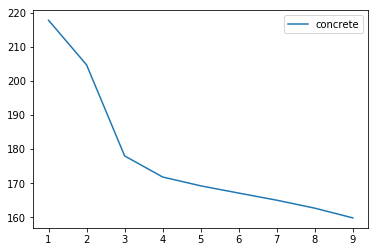

In [3]:
epoch_space = np.linspace(1,9,9)
# plt.plot(epoch_space, loss_Gaussian, label='Gaussian')
# plt.plot(epoch_space, loss_logit, label='logit')
plt.plot(epoch_space, loss_concrete, label='concrete')
plt.legend()
plt.show()

## 2-D scatterplot

In [4]:
def find_latent_coordinates(train_loader_scatter_plot, model):
    
    x_coordinates = defaultdict(lambda: [])
    y_coordinates = defaultdict(lambda: [])
    
    for batch_idx, (data, label) in enumerate(train_loader_scatter_plot):
        _, z, _ = model(data)
        index = label.data.cpu().numpy()[0]
        
        x_coordinates[index].append(z.data.cpu().numpy()[0][0])
        y_coordinates[index].append(z.data.cpu().numpy()[0][1])
        
        if batch_idx == 10000:
            break
            
    return x_coordinates, y_coordinates

In [5]:
import collections
from collections import *

# Reconstructed
train_data_scatter_plot = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor())

train_loader_scatter_plot = torch.utils.data.DataLoader(train_data_scatter_plot,
                                           batch_size=1, shuffle=False, **{})

# x_latent_space_Gaussian, y_latent_space_Gaussian = find_latent_coordinates(train_loader_scatter_plot, VAE_Gaussian)
# x_latent_space_logit, y_latent_space_logit = find_latent_coordinates(train_loader_scatter_plot, VAE_logit)
x_latent_space_Gumbel, y_latent_space_Gumbel = find_latent_coordinates(train_loader_scatter_plot, VAE_concrete)



In [ ]:
for label in x_latent_space_Gumbel:
#     print(x_latent_space_Gumbel[label], y_latent_space_Gumbel[label])
    plt.scatter(x_latent_space_Gumbel[label], y_latent_space_Gumbel[label], marker='.')
plt.show()

# for item in VAE_concrete.parameters():
#     print(item.data)

In [5]:
for label in x_latent_space_Gaussian:
    plt.scatter(x_latent_space_Gaussian[label], y_latent_space_Gaussian[label], marker='.')
plt.show()

NameError: name 'x_latent_space_Gaussian' is not defined

In [6]:
for label in x_latent_space_logit:
    plt.scatter(x_latent_space_logit[label], y_latent_space_logit[label], marker='.')
plt.show()

NameError: name 'x_latent_space_logit' is not defined

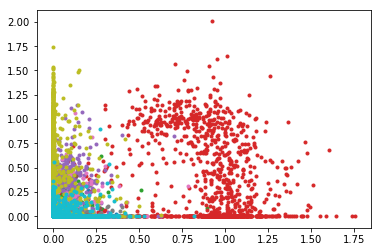

In [6]:
for label in x_latent_space_Gumbel:
#     print(x_latent_space_Gumbel[label], y_latent_space_Gumbel[label])
    plt.scatter(x_latent_space_Gumbel[label], y_latent_space_Gumbel[label], marker='.')
plt.show()

# for item in VAE_concrete.parameters():
#     print(item.data)

## 2-D plot of models

In [ ]:
### Let's check if the reconstructions make sense
# Set model to test mode
VAE_MNIST.eval()
    
# Reconstructed
train_data_plot = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor())

train_loader_plot = torch.utils.data.DataLoader(train_data_plot,
                                           batch_size=1, shuffle=False, **{})

for batch_idx, (data, _) in enumerate(train_loader_plot):
    x_hat, mu, logvar = VAE_MNIST(data)
    plt.imshow(x_hat.view(1,28,28).squeeze().data.numpy(), cmap='gray')
    plt.title('%i' % train_data.train_labels[batch_idx])
    plt.show()
    if batch_idx == 3:
        break